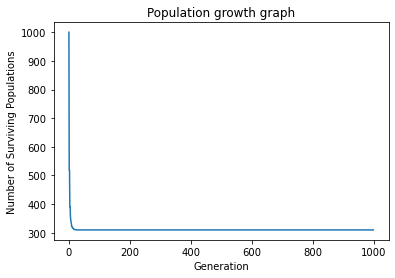

Y = 660.7292321533469 * e^(-0.7553813873081834 * x) + 310.22273754137393


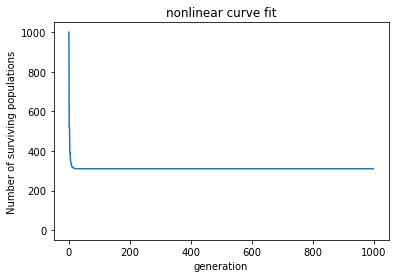

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# Number of poulations needed
n_populations  = 1000

# Create 1000 replicate population of one individual
populations  = np.ones(n_populations)

# Number of generations simulated 
n_generations = 1000

# Lists to store data 
surviving_populations  = []
average_populations = []
total_populations = []



# Simulation process for i generations 
for i in range(n_generations):
    extinct = populations <= 0
    surviving_populations.append(len(populations[~extinct]))
    average_populations.append(np.mean(populations[~extinct]))
    total_populations.append(np.sum(populations[~extinct]))
    
    for j in range(n_populations):
        e = np.random.rand()
        if e < 0.5:
            populations[j] = populations[j]-1     
            
        if e > 0.5:
            populations[j] = populations[j] * 2
            
  

# Plot the Population Growth Graph

plt.plot(range(n_generations), surviving_populations)
plt.title("Population growth graph")
plt.xlabel("Generation")
plt.ylabel("Number of Surviving Populations")
plt.show()


# Find line of best fit for population growth graph:
f = range(n_populations)

# Define Function
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# Set initial "Guess" parameters from what we see in the graph p0 = (a, b, c) on ae^-bx + c function
p0 = (700, 2, 300)

# Use Scipy.Optimize function to best fit the data
parameterss, c = scipy.optimize.curve_fit(monoExp, f, surviving_populations, p0)
m, t, b = parameterss

# Plot fitted curve to get a different view on the asymptote
plt.plot(f, surviving_populations)
plt.plot(m,t)
plt.title("nonlinear curve fit")
plt.xlabel("generation")
plt.ylabel("Number of surviving populations")


#Print Line of best fit equation
print(f"Y = {m} * e^(-{t} * x) + {b}")